#### 이미지 필터링은 여러 수식을 이용하여 이미지를 이루고 있는 픽셀 행렬을 다른 값으로 바꾸어 이미지를 변형하는 것을 말한다.

## 임계처리

임계처리(thresholding)는 이미지 행렬에서 하나의 픽셀값을 사용자가 지정한 기준값(threshold)를 사용하여 이진화(binarization)하는 가장 단순한 필터다. OpenCV에서는 threshold라는 함수로 구현되어 있다. 인수는 다음과 같다.

+ threshold(src, thresh, maxval, type)
    + src : 그레이 스케일 이미지
    + thresh : 기준값
    + maxval : 기준값을 넘었을 때 적용할 최대값
    + type : 임계처리 유형
        + THRESH_BINARY : 기준값을 넘으면 최대값 아니면 0
        + THRESH_BINARY_INV : 기준값을 넘으면 0 아니면 최대값
        + THRESH_TRUNC : 기준값을 넘으면 기준값 아니면 최대값
        + THRESH_TOZERO : 기준값을 넘으면 원래값 아니면 0
        + THRESH_TOZERO_INV : 기준값을 넘으면 0 아니면 원래값

각 임계유형의 결과를 시각화하면 다음과 같다.

In [1]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

import cv2

In [2]:
from skimage.data import coins

In [3]:
img = coins()
img.shape

(303, 384)

In [4]:
maxval = 255
thresh = maxval / 2

_, thresh1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY) # 기준값 넘으면 최대값
_, thresh2 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY_INV) # 기준값 넘으면 0
_, thresh3 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TRUNC) # 기준값 넘으면 기준값, 안넘으면 최대값
_, thresh4 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO) # 기준값 넘으면 원래 값
_, thresh5 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO_INV) # 기준값 넘으면 0

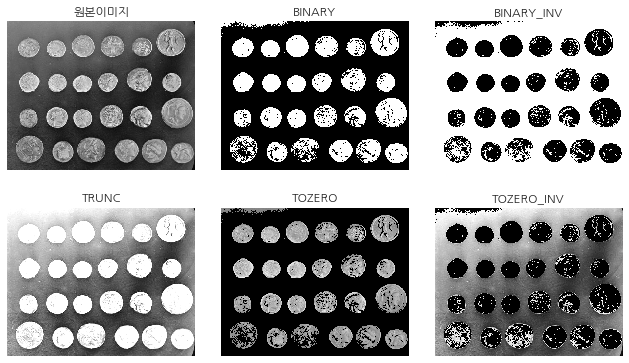

In [5]:
titles = ["원본이미지", "BINARY", "BINARY_INV", "TRUNC", "TOZERO", "TOZERO_INV"]
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(9, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap=mpl.cm.gray)
    plt.axis("off")
    plt.title(titles[i])
    
plt.tight_layout(pad=0.7, h_pad=3.0)
plt.show()    

## 적응임계처리

임계처리의 경우는 이미지 전체에 하나의 기준값을 적용한다. 

#### 적응임계처리는 일정한 영역 내의 이웃한 픽셀들의 값들을 이용하여 해당 영역에 적용할 기준값을 자체적으로 계산한다. 

OpenCV에서는 adaptiveThreshold 함수로 구현되어 있다.

+ adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)
    + src : 그레이스케일 이미지
    + maxValue – 기준값을 넘었을 때 적용할 값
    + adaptiveMethod : 영역 내에서 기준값을 계산하는 방법.
        + ADAPTIVE_THRESH_MEAN_C: 영역 내의 평균값에 C를 뺀 값을 기준값으로 사용
        + ADAPTIVE_THRESH_GAUSSIAN_C: 영역에 추후 설명할 가우시안 블러를 적용한 후 C를 뺀 값을 기준값으로 사용
    + thresholdType : 임계처리 유형
        + THRESH_BINARY
        + THRESH_BINARY_INV
    + blockSize : 임계처리를 적용할 영역의 크기
    + C : 평균이나 가중평균에서 차감할 값

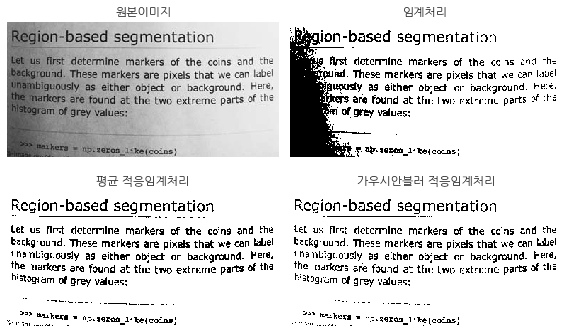

In [6]:
from skimage.data import page

img = page()

maxval = 255
thresh = 126

ret, th1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)

k = 15
C = 20

th2 = cv2.adaptiveThreshold(img, maxval, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, k, C)
th3 = cv2.adaptiveThreshold(img, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, k, C)

images = [img, th1, th2, th3]
titles = ['원본이미지', "임계처리", "평균 적응임계처리", "가우시안블러 적응임계처리"]

plt.figure(figsize=(8, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.axis("off")
    
plt.tight_layout()
plt.show()

## 이미지 필터링

이미지 필터링(image filtering)은 필터(filter) 또는 커널(kernel) 또는 윈도우(window)라고 하는 정방행렬을 정의하고 이 커널을 이동시키면서 같은 이미지 영역과 곱하여 그 결과값을 이미지의 해당 위치의 값으로 하는 새로운 이미지를 만드는 연산이다. 기호  ⊗ 로 표기한다.

원본 이미지의  (𝑥,𝑦)  위치의 명도를  𝑓(𝑥,𝑦) , 필터 이미지를  ℎ(𝑥,𝑦) , 필터링된 결과를  𝑔(𝑥,𝑦) 라고 하면 수식으로 다음과 같다.

$$f \otimes h = \sum_{u=-K/2}^{K} \sum_{v=-K/2}^{K} f(x + u, y + v) \cdot h(u, v)$$

이 식에서  𝐾 는 필터 크기의 절반을 뜻한다. 예를 들어  3×3  크기의 필터에서는  𝐾=1 이다. 위 식을 줄여서 다음과 같이 나타내기도 한다.  𝑊 S는 윈도우 영역을 뜻한다.

$$f \otimes h = \sum_{W} f(x + u, y + v) \cdot h(u, v)$$

#### 위 식에서 필터를 좌우 상하로 뒤집으면 콘볼루션(convolution)이라고 한다. 기호  ∗ 로 표기한다.

$$f * h = f \otimes \tilde{h} = \sum_{W} f(x - u, y - v) \cdot \tilde{h}(u, v)$$

$$\tilde{h}(u, v) = h(-u, -v)$$

[그림] 윈도우 연산 : https://datascienceschool.net/upfiles/0742fffa9e614cd78a8cba4ad08f0bc7.jpeg

openCV에서는 filter2D 함수를 사용한다

filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])

+ src: 이미지
+ ddepth: 이미지 깊이(자료형 크기). -1이면 입력과 동일
+ kernel: 커널 행렬

#### 다음 코드는 평균을 구하는 커널 적용한 예다. 커널 크기가 커지면서 이미지가 점점 더 흐려지는 것을 볼 수 있다.



In [7]:
import cv2
from skimage.data import astronaut

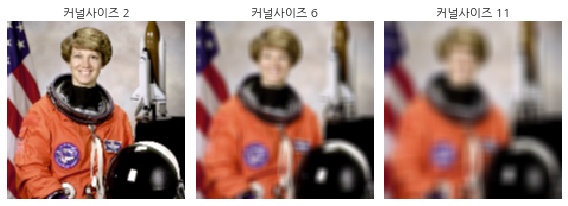

In [8]:
img = astronaut()
img = cv2.resize(img, dsize=(150, 150))

plt.figure(figsize=(8, 3))
for i, k in enumerate([2, 6, 11]):
    kernel = np.ones((k, k)) / k**2
    filtering = cv2.filter2D(img, -1, kernel)
    plt.subplot(1, 3, i+1)
    plt.imshow(filtering)
    plt.title("커널사이즈 {}".format(k))
    plt.axis("off")
    
plt.tight_layout()
plt.show()

## 블러

블러는 이미지 필터링을 사용하여 이미지를 흐리게 만드는 것을 말한다. 노이즈를 제거하거나 경계선을 흐리게 하기 위해 쓴다. 다음과 같은 방법이 있다.

+ 평균 블러
+ 중앙값 블러
+ 가우시안 블러
+ 양방향 블러

### 1. 평균 블러

평균 블러 방법은 균일한 값을 가지는 커널을 이용한 이미지 필터링이다. 따라서 커널 영역내의 평균값으로 해당 픽셀을 대체한다. OpenCV에서는 blur 함수로 구현되어 있다.

#### blur(src, ksize)

+ src: 원본 이미지
+ ksize: 커널 크기

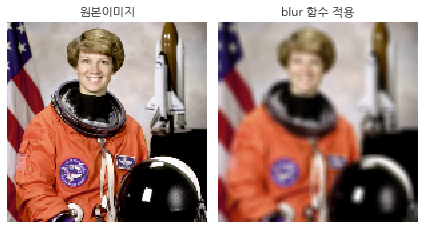

In [9]:
blur = cv2.blur(img, (5, 5))
boxfilter = cv2.boxFilter(img, -1, (5, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("원본이미지")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(blur)
plt.title("blur 함수 적용")
plt.axis("off")

plt.tight_layout()
plt.show()

### 2. 중앙값 블러

중앙값 블러는 평균이 아닌 중앙값으로 해당 픽셀을 대체한다. 이 필터링 방법은 점 모양의 잡음을 제거하는데 효과적이다. OpenCV에서는 medianBlur 함수를 사용한다.

#### medianBlur(src, ksize)

+ src: 원본 이미지
+ ksize: 커널 크기

In [10]:
# 점 잡음 적용
img_noise = img.copy()

np.random.seed(0)
N = 500
idx1 = np.random.randint(img.shape[0], size=N) # 이미지에 잡음을 넣을 인덱스 랜덤으로 생성
idx2 = np.random.randint(img.shape[1], size=N)
img_noise[idx1, idx2] = 255  # 잡음 이미지 값
img_noise.shape

(150, 150, 3)

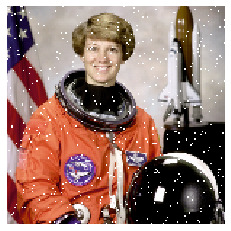

In [11]:
# 잡음을 넣은 상태
plt.imshow(img_noise)
plt.axis("off")
plt.show()

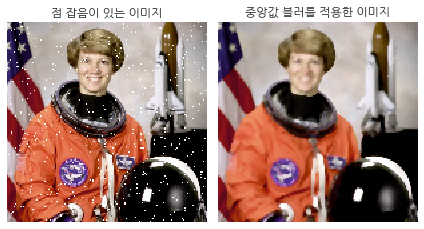

In [12]:
# 중앙값 블러로 잡음 제거
img_denoise = cv2.medianBlur(img_noise, 3)

plt.subplot(1, 2, 1)
plt.imshow(img_noise)
plt.title("점 잡음이 있는 이미지")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_denoise)
plt.title("중앙값 블러를 적용한 이미지")
plt.axis("off")

plt.tight_layout()
plt.show()

### 3. 가우시안 블러

가우시안 블러는 가우시안 함수  𝐺 를 커널로 사용한다. 가우시안 커널은 중앙 위치  (𝑥,𝑦) 와 커널 위치  (𝑥+𝑢,𝑦+𝑣) 의 거리 차이  (𝑢,𝑣) 가 클수록 가중치가 작아진다.

$$f \otimes G = \sum_{W} f(x + u, y + v) \cdot G(u, v) = \sum_{W} f(x + u, y + v) \cdot G((x+u)-x, (y+v)-y)$$

In [13]:
gauss1d = cv2.getGaussianKernel(100, 15)
gauss2d = gauss1d @ gauss1d.T

In [14]:
gauss1d.shape, gauss2d.shape

((100, 1), (100, 100))

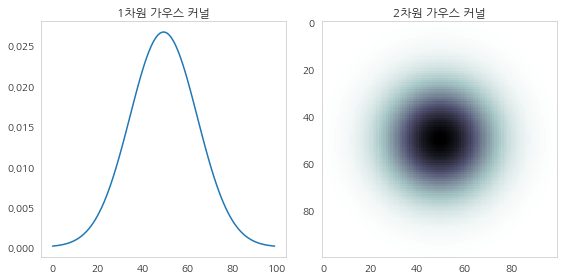

In [15]:
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.plot(gauss1d)
plt.grid(False)
plt.title("1차원 가우스 커널")

plt.subplot(122)
plt.imshow(gauss2d, cmap=mpl.cm.bone_r)
plt.grid(False)
plt.title("2차원 가우스 커널")

plt.tight_layout()
plt.show()

OpenCV에서는 GaussianBlur 함수로 구현되어 있다.

#### GaussianBlur(src, ksize, sigmaX)

+ src: 원본 이미지
+ ksize: 커널 크기
+ sigmaX: 표준편차

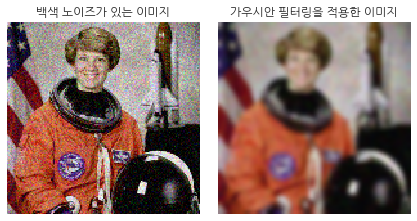

In [16]:
# 백색 잡음 이미지 만들기
# np.clip(배열, 최소값 기준, 최대값 기준)  최대값, 최소값 기준으로 이를 벗어나는 값에 대해서는 일괄적으로 최소값, 최대값으로 대체
img_noise = np.clip((img / 255 + np.random.normal(scale=0.1, size=img.shape)) * 225, 0, 255).astype('uint8')

# 가우시안 블러로 잡음 제거
img_denoise = cv2.GaussianBlur(img_noise, (9, 9), 2)  # img, kernel size, sigma

plt.subplot(1, 2, 1)
plt.imshow(img_noise)
plt.title("백색 노이즈가 있는 이미지")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_denoise)
plt.title("가우시안 필터링을 적용한 이미지")
plt.axis("off")

plt.tight_layout()
plt.show()

### 4. 양방향 필터링

가우시안 필터링을 쓰면 이미지의 경계선도 흐려진다. 

#### 양방향 필터링(Bilateral Filtering)은 두 픽셀과의 거리 뿐 아니라 두 픽셀의 명암값의 차이도 커널에 넣어서 가중치로 곱한다.

+ 일반 이미지 필터링
$$f \otimes G = \sum_{W} f(x + u, y + v) \cdot G((x+u)-x, (y+v)-y)$$

+ 양방향 이미지 필터링
$$f \otimes G = \sum_{W} f(x + u, y + v) \cdot G((x+u)-x, (y+v)-y) \cdot G'(f(x+u)-f(x), f(y+v)-f(y))$$

따라서 픽셀값의 차이가 너무 크면 가중치가 0에 가까운 값이 되어 합쳐지지 않으므로 영역과 영역사이의 경계선이 잘 보존된다.

OpenCV에서는 bilateralFilter 함수로 구현되어 있다.

#### bilateralFilter(src, d, sigmaColor, sigmaSpace)

+ src: 원본 이미지
+ d: 커널 크기
+ sigmaColor: 색공간 표준편차. 값이 크면 색이 많이 달라도 픽셀들이 서로 영향을 미친다.
+ sigmaSpace: 거리공간 표준편차. 값이 크면 멀리 떨어져있는 픽셀들이 서로 영향을 미친다.

In [17]:
img_denoise1 = cv2.GaussianBlur(img_noise, (9, 9), 2)
img_denoise2 = cv2.bilateralFilter(img_noise, 9, 75, 75)

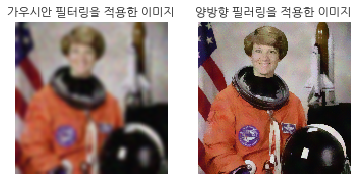

In [18]:
plt.subplot(121)
plt.imshow(img_denoise1)
plt.title("가우시안 필터링을 적용한 이미지")
plt.axis("off")

plt.subplot(122)
plt.imshow(img_denoise2)
plt.title("양방향 필러링을 적용한 이미지")
plt.axis("off")

plt.show()

## 형태학적 변환

#### 이진화한 이미지에서는 같은 값을 가진 픽셀이 이웃하여 있으면 이를 형태학적 영역(morphological region)으로 생각할 수 있다. 

이미지의 형태학적 변환(morphological transformation)은 이미지 필터링을 사용하여 영역을 변화시키는 방법이다.

변환에 적용할 커널은 getStructuringElement 함수로 생성한다.

#### getStructuringElement(shape, ksize)

+ shape: 커널 모양
    + cv2.MORPH_RECT: 사각형
    + cv2.MORPH_ELLIPSE: 타원형
    + cv2.MORPH_CROSS: 십자
+ ksize: 커널 크기

In [19]:
cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [20]:
cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [21]:
cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

### 1. 침식 기법

#### 침식 기법은 각 픽셀에 커널을 적용하여 커널 영역 내의 최소값으로 해당 픽셀을 대체한다. 이진화된 이미지에서는 0인 영역이 증가한다.

OpenCV에서는 erode함수로 구현되어 있다.

#### erode(src, kernel)

+ src: 원본 이미지
+ kernel: 커널

다음 코드는 이미지를 여러 커널 모양을 이용하여 침식 기법으로 변환한다. 검은색이 0인 영역, 흰색이 1인 영역이다. 검은색(0)이 흰색을 침식해 들어가는 것을 알 수 있다.

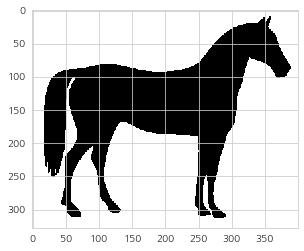

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [22]:
from skimage.data import horse

img = horse().astype('uint8')
plt.imshow(img, 'gray')
plt.show()
img[:5]

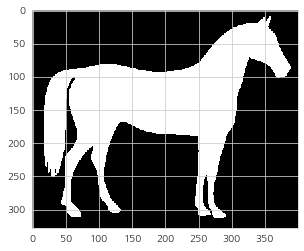

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
img = np.ones(img.shape) - img  # 원래 이미지 픽셀값 0->1, 1->0으로 값을 바꾸기
plt.imshow(img, 'gray')
plt.show()
img[:5]

In [24]:
ksize = (20, 20)
kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT, ksize)  # 사각형 커널
kernel[1] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize) # 타원 커널
kernel[2] = cv2.getStructuringElement(cv2.MORPH_CROSS, ksize) # 십자 커널
title = ["사각형 커널", "타원 커널", "십자가 커널"]

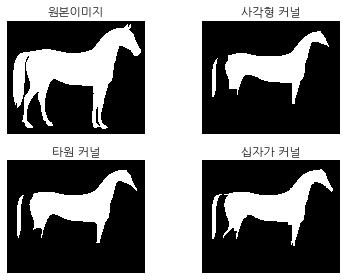

In [25]:
plt.subplot(221)
plt.imshow(img, 'gray')
plt.axis("off")
plt.title("원본이미지")

for i in range(3):
    plt.subplot(2, 2, i + 2)
    erosion = cv2.erode(img, kernel[i])
    plt.imshow(erosion, 'gray')
    plt.title(title[i])
    plt.axis('off')
    
plt.tight_layout()
plt.show()

### 2. 팽창

#### 팽창(Dilation)은 침식과 반대로 커널 영역내의 최댓값으로 해당 픽셀을 대체하는 것이다. 

OpenCV에서는 dilate 함수로 구현되어 있다.

#### dilate(src, kernel)

+ src: 원본 이미지
+ kernel: 커널

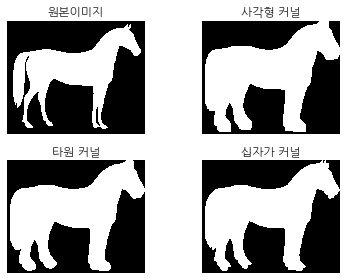

In [26]:
plt.subplot(2, 2, 1)
plt.imshow(img, 'gray')
plt.title('원본이미지')
plt.axis('off')

for i in range(3):
    plt.subplot(2, 2, i+2)
    expansion = cv2.dilate(img, kernel[i])
    plt.imshow(expansion, 'gray')
    plt.title(title[i])
    plt.axis('off')
    
plt.tight_layout()
plt.show()

### 3. 그레디언트, 오프닝, 클로징

#### 그레디언트는 팽창으로 확장시킨 영역에서 침식으로 축소시킨 영역을 빼서 윤곽선을 파악하는 것이다.

이와 유사한 기법으로 오프닝(Opening)과 클로징(Closing)이 있다. 오프닝은 침식을 적용한 뒤 팽창을 적용하는 것으로 영역이 점점 둥글게 되므로 점 잡음, 작은 물체, 돌기 등을 제거하는데 적합하다. 클로징은 반대로 팽창을 적용한 뒤 침식을 적용하여 영역이 영역이 붙기 때문에 전체적인 윤곽을 파악하는데 적합하다.

그레디언트를 구하려면 OpenCV의 morphologyEx 라는 함수를 사용한다.

#### morphologyEx(src, op, kernel)

+ src: 원본 이미지
+ op:
    + cv2.MORPH_OPEN: cv2.dilate(cv2.erode(image))
    + cv2.MORPH_CLOSE: cv2.erode(cv2.dilate(image))
    + cv2.MORPH_GRADIENT: cv2.dilate(image) - cv2.erode(image)
    + cv2.MORPH_TOPHAT: image - opening(image)
    + cv2.MORPH_BLACKHAT: image - closing(image)
+ kernel: 커널

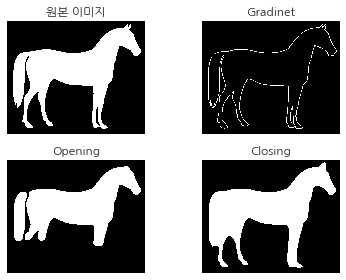

In [27]:
img = horse().astype('uint8')
img = np.ones(img.shape) - img

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))) # 타원커널을 적용하고, 팽창
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20)))
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))

images = [img, gradient, opening, closing]
titles = ["원본 이미지", "Gradinet", "Opening", 'Closing']

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

### Practice 1

다음 왼쪽 이미지를 필터링 처리하여 오른쪽 이미지와 같이 종이 부분만을 이진화하여라. 이미지는 다음 명령으로 내려받는다.

In [28]:
!wget https://datascienceschool.net/upfiles/63a2990218f1487b8e0dfd4dac8f3a5e.png -O receipt.png

--2019-08-28 21:05:33--  https://datascienceschool.net/upfiles/63a2990218f1487b8e0dfd4dac8f3a5e.png
Resolving datascienceschool.net... 114.202.2.86
Connecting to datascienceschool.net|114.202.2.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2731251 (2.6M) [image/png]
Saving to: ‘receipt.png’

receipt.png         100%[===================>]   2.60M  2.28MB/s    in 1.1s    

2019-08-28 21:05:34 (2.28 MB/s) - ‘receipt.png’ saved [2731251/2731251]



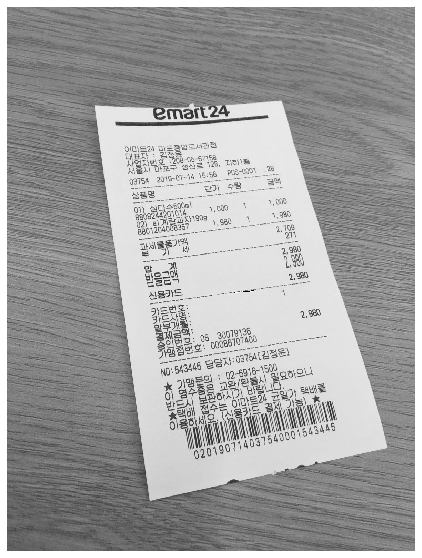

In [29]:
img = cv2.imread("./receipt.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(10, 10))
plt.imshow(img_gray, 'gray')
plt.axis('off')
plt.show()